<a href="https://colab.research.google.com/github/graccelle/hello-world/blob/master/FRED_TreasuryRate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Background**
Across industries, organizations commonly use time series data, which means any information collected over a regular interval of time, in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics and retail demand, among others. Analyzing time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year. 

### **Reading and Visualizing Data Series**


In [1]:
pip install fredapi

In [2]:
#Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20,5)
import matplotlib.ticker as tkr
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pydot as py
from decimal import Decimal
import numpy as np
import pandas as pd
from fredapi import Fred
import os
import pandas
import numpy
#import matplotlib.pyplot as plot

In [3]:
#initialize Fred Object
fred = Fred(api_key="9344938ee7160a4c721ab3de427ba8f6")

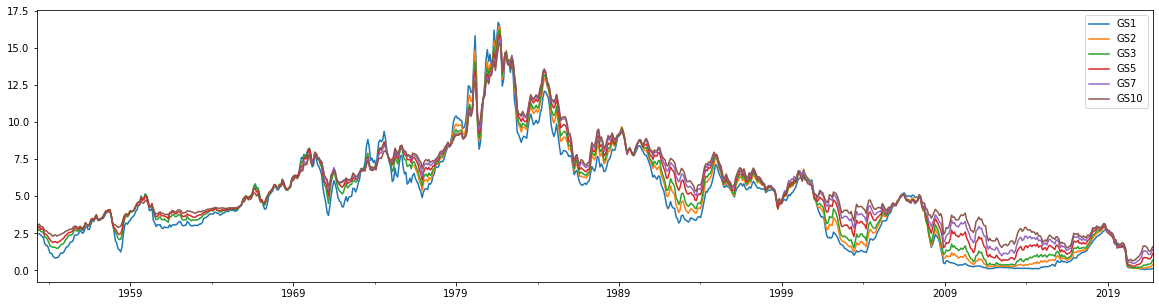

In [4]:
df={}
df['GS1']=fred.get_series('GS1')
df['GS2']=fred.get_series('GS2')
df['GS3']=fred.get_series('GS3')
df['GS5']=fred.get_series('GS5')
df['GS7']=fred.get_series('GS7')
df['GS10']=fred.get_series('GS10')
df=pd.DataFrame(df)
df.plot()

In [5]:
print(df.head())

             GS1  GS2   GS3   GS5  GS7  GS10
1953-04-01  2.36  NaN  2.51  2.62  NaN  2.83
1953-05-01  2.48  NaN  2.72  2.87  NaN  3.05
1953-06-01  2.45  NaN  2.74  2.94  NaN  3.11
1953-07-01  2.38  NaN  2.62  2.75  NaN  2.93
1953-08-01  2.28  NaN  2.58  2.80  NaN  2.95


In [6]:
df.isna().sum()

GS1       0
GS2     278
GS3       0
GS5       0
GS7     195
GS10      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 823 entries, 1953-04-01 to 2021-10-01
Freq: MS
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GS1     823 non-null    float64
 1   GS2     545 non-null    float64
 2   GS3     823 non-null    float64
 3   GS5     823 non-null    float64
 4   GS7     628 non-null    float64
 5   GS10    823 non-null    float64
dtypes: float64(6)
memory usage: 45.0 KB


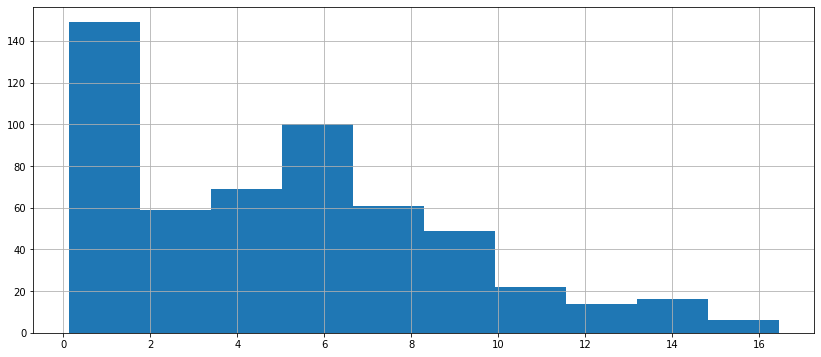

In [144]:
#see the distribution of the year_2 column
df.GS2.hist(figsize= (14,6))

In [8]:
#fill missing values in year_2 with the median
get_median = df['GS2'].median()

df['GS2'] = df['GS2'].fillna(get_median)

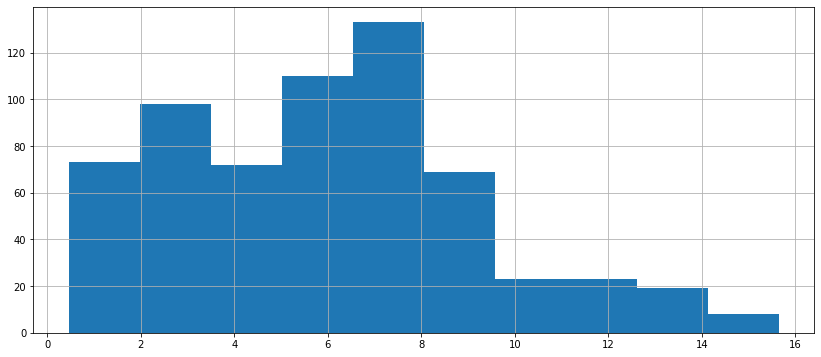

In [146]:
#see the distribution of the year_7 column
df.GS7.hist(figsize= (14,6))

In [9]:
#fill missing values in year_7 with the median
get_median = df['GS7'].median()

df['GS7'] = df['GS7'].fillna(get_median)

In [10]:
#see final datatset
df.head()

,GS1,GS2,GS3,GS5,GS7,GS10
1953-04-01,2.36,4.96,2.51,2.62,6.15,2.83
1953-05-01,2.48,4.96,2.72,2.87,6.15,3.05
1953-06-01,2.45,4.96,2.74,2.94,6.15,3.11
1953-07-01,2.38,4.96,2.62,2.75,6.15,2.93
1953-08-01,2.28,4.96,2.58,2.80,6.15,2.95


In [11]:
#confirm no  missing values
df.isna().sum()

GS1     0
GS2     0
GS3     0
GS5     0
GS7     0
GS10    0
dtype: int64

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
df_scaled = StandardScaler().fit_transform(df)

In [14]:
pca = PCA()
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

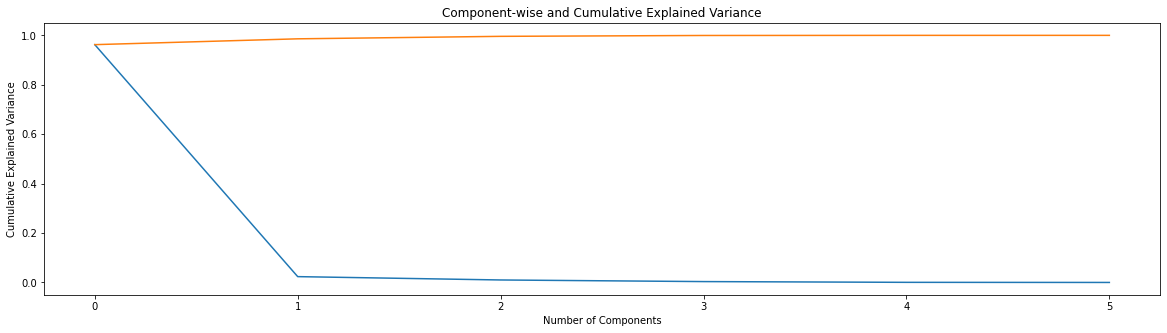

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Component-wise and Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [16]:
(pca.explained_variance_ratio_[:1]).sum()

0.9623930768995804

The first PCA contain approximately 96.24% of the variance, while we need at least two principal components to explaine about 98.6% of the variance for the the time period (i.e. between '1953-04-01' and '2021-10-01'). Let's check how these 3 principal components are stable over time

In [17]:
#PC1= PCA (n_components =2).fit_transform( range_1_scaled)
#print(PC1)
PC1=PCA(n_components =2).fit_transform(df_scaled)
print(PC1[:5])

[[-1.36297103  0.97472509]
 [-1.25708137  0.89840378]
 [-1.24048264  0.88376726]
 [-1.31503085  0.93949848]
 [-1.32302816  0.94071698]]


In [18]:
PCA_Outputs = pca.components_
print(PCA_Outputs[:2])

[[ 0.40846353  0.40245697  0.41403453  0.41318003  0.40395752  0.40726148]
 [-0.19674914  0.61325418 -0.22692901 -0.29413799  0.53109733 -0.40636287]]


In [19]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df.columns))],
index=df.columns)
print(loadings)

           PC0       PC1       PC2       PC3       PC4       PC5
GS1   0.408464 -0.196749  0.692851  0.273943  0.478826  0.100430
GS2   0.402457  0.613254  0.217509 -0.641972 -0.043858  0.024208
GS3   0.414035 -0.226929  0.156077  0.114570 -0.610858 -0.605347
GS5   0.413180 -0.294138 -0.154385 -0.018933 -0.396275  0.749359
GS7   0.403958  0.531097 -0.404231  0.615141  0.111451 -0.023068
GS10  0.407261 -0.406363 -0.510931 -0.347770  0.475605 -0.246602


In [20]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
columns = ['pca_%i' % i for i in range(2)]
df_pca = pd.DataFrame(pca.transform(df_scaled), columns=columns, index=df.index)
df_pca.head()
#df_pca.info()
#PC1=PCA(n_components =2).fit_transform(df_scaled)

,pca_0,pca_1
1953-04-01,-1.362971,0.974725
1953-05-01,-1.257081,0.898404
1953-06-01,-1.240483,0.883767
1953-07-01,-1.315031,0.939498
1953-08-01,-1.323028,0.940717


Now we conduct our time-series analysis on the reduced dimension data, which are the first two PCs that account for approximately 99% of in the dataset as the new variables of input for the time-series analysis. **New variables are PCA0 and PCA1.**

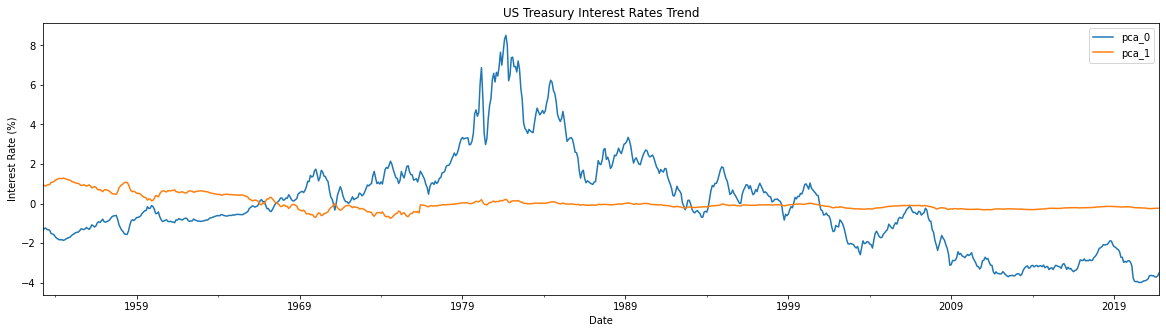

In [22]:
#df_pca=pd.DataFrame(df_pca)
df_pca.plot()
plt.xlabel('Date'); plt.ylabel('Interest Rate (%)'); 
plt.title('US Treasury Interest Rates Trend')
plt.legend();

From the plot above, we could deduce that PC0 has a better trend (i.e., shows seasonality) compared to PC1 which does not really portray a good time-series data. Hence, for this analysis, we will be using only PC0 as our input variable for this time-series analysis. Also, PC0 accounts for about 96.24% of the variance in the series (which is between '1953-04-01' till '2021-10-01').
Next, we extract only one PC from the reduced data dimension.

In [23]:
pca1 = PCA(n_components=1)
pca1.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
columns = ['pca1_%i' % i for i in range(1)]
df_pca1 = pd.DataFrame(pca1.transform(df_scaled), columns=columns, index=df.index)
df_pca1.index = pd.to_datetime(df_pca1.index, format='%Y-%m-%d')
df_pca1.index.name = 'Date'
#print(df_pca1.head())
#df.index = pd.to_datetime(df.index)
df_pca1.head()
#df_pca.info()
#PC1=PCA(n_components =2).fit_transform(df_scaled)

,pca1_0
Date,
1953-04-01,-1.362971
1953-05-01,-1.257081
1953-06-01,-1.240483
1953-07-01,-1.315031
1953-08-01,-1.323028


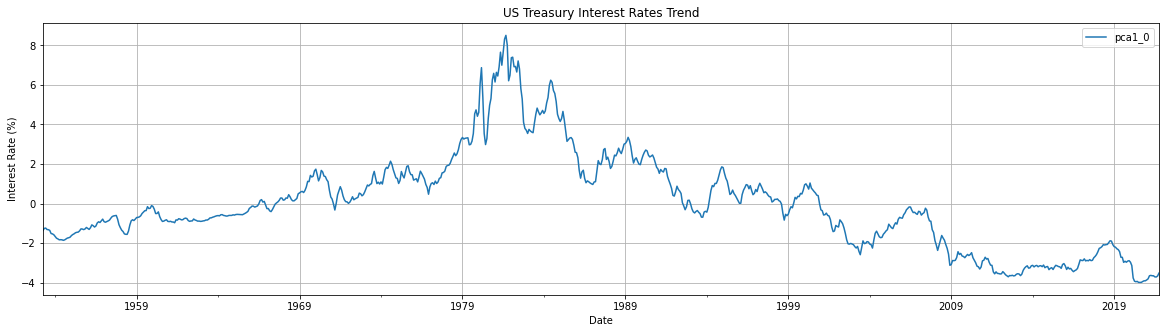

In [25]:
#df_pca1=pd.DataFrame(df_pca1)
df_pca1.plot()
#plt.xlabel('Date'); 
plt.ylabel('Interest Rate (%)'); 
plt.title('US Treasury Interest Rates Trend')
plt.grid(True)
plt.legend();

In [26]:
#df_pca1.unstack()
df_pca1[df_pca1.columns[0]]
#df_pca1.round(2).astype(int);
df_pca1.dtypes

pca1_0    float64
dtype: object

### **Testing for Stationarity in the Reduced Dimension Time Series Data**
It is important to test for stationarity in a time series because it makes modeling easier, and it is the underlying assumption in most time series methods such as the one used in our model (i.e., ARIMA).

Simply put, stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

We will use the **Dickey Fuller test** to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.

These values allow us to test the degree to which present values change with past values. If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

**Testing of Dickey Fuller Hypothesis**
1.   **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
2.   **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

To begin testing for stationarity on the FRED US treasury rates for the 6 series data, we will calculate a **twelve-month rolling mean and rolling standard deviation:**

**Rolling Statistics Plot & Dickey-Fuller Test Procedure**

In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original Treasury Rate Data')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean Treasury Rate')
    std = plt.plot(rolstd, color='black', label = 'Rolling Standard Deviation in Treasury Rate')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate (%)')
    plt.grid(True)
    plt.title('Treasury Rate Time Series, Rolling Mean, Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

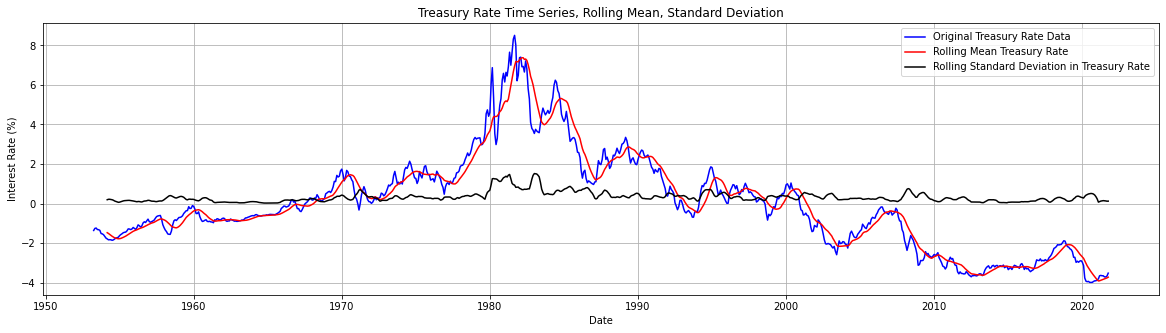

Results of Dickey-Fuller Test:
Test Statistic                  -1.066365
p-value                          0.728297
#Lags Used                      21.000000
Number of Observations Used    801.000000
Critical Value (1%)             -3.438540
Critical Value (5%)             -2.865155
Critical Value (10%)            -2.568695
dtype: float64


In [28]:
test_stationarity(df_pca1['pca1_0'])

**Dickey Fuller Hypothesis Test**

The p-value is > 0.05: Fail to reject the null hypothesis (H0). This means that the data has a unit root and is not stationary. In addition, the test statistics is greater than the three critical values.

Also, from the rolling statistics plot, it is obvious from the rolling mean that trends with time which indicates that the series is not stationary.

---



### **Making the Series Stationary**
In this step, we are trying to make the series stationary by taking out "Trend" or "Seasonality" from the series. To achieve this, we will be using "Differencing" and "Decomposition".
1.   Differencing is simply taking the difference of the observation at a particular time (instant) with that at a prior time.
2.   Decomposition is modeling both trend and seasonality, then removing them from the model.



**Differencing Procedure**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log



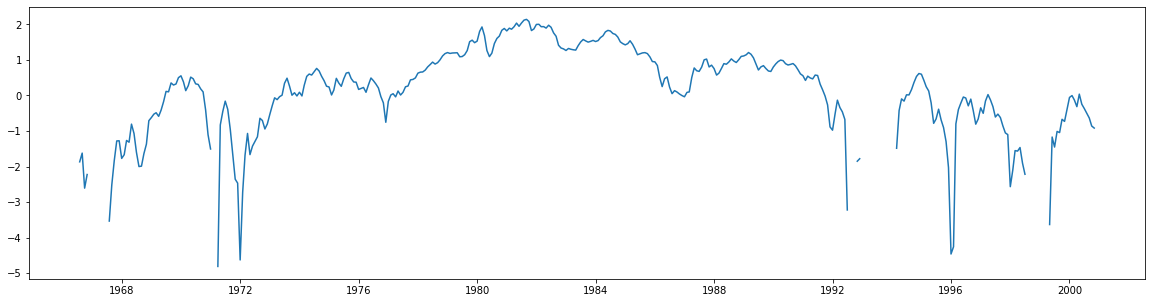

In [29]:
df_pca1_log = np.log(df_pca1)
plt.plot(df_pca1_log)

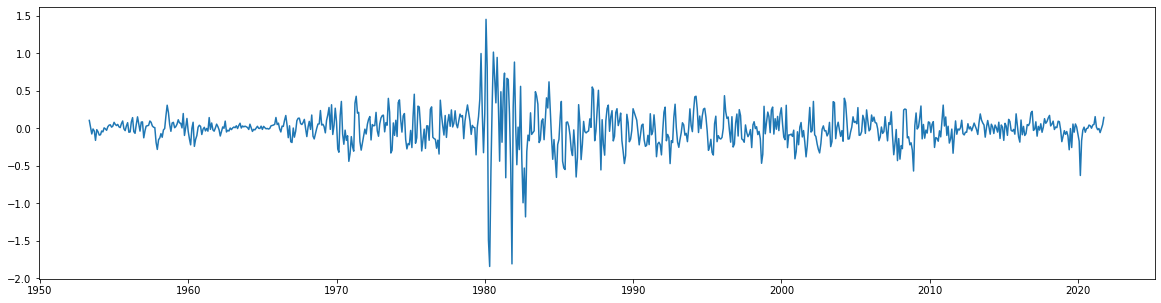

In [32]:
#df_pca1_log_diff = df_pca1_log - df_pca1_log.shift()
#plt.plot(df_pca1_log_diff)
df_pca1_diff = df_pca1 - df_pca1.shift()
plt.plot(df_pca1_diff)

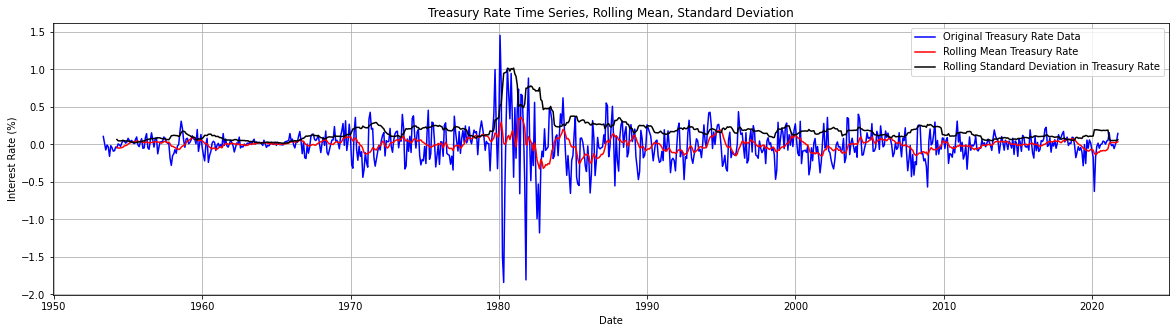

Results of Dickey-Fuller Test:
Test Statistic                -7.561100e+00
p-value                        3.008602e-11
#Lags Used                     2.000000e+01
Number of Observations Used    8.010000e+02
Critical Value (1%)           -3.438540e+00
Critical Value (5%)           -2.865155e+00
Critical Value (10%)          -2.568695e+00
dtype: float64


In [33]:
df_pca1_diff.dropna(inplace=True)
test_stationarity(df_pca1_diff['pca1_0'])
#df_pca1_log_diff.dropna(inplace=True)
#test_stationarity(df_pca1_log_diff['pca1_0'])

 **Differencing Results**
 
From the output of the dickey-fuller test, the series is stationary given that the p-value is less than all the critical value percentages. Hence, we are 99% confidence that the series is stationary. Also, the plot shows that the mean and standard variations have very small variations with time.
One important thing to note regarding this series is that, the log of the variable (pca1_0) was not taken to take the difference. Reason being that, this input variable has already been transformed before generating the value. Simply put, the original data series was standardized before applying the dimension reduction to the data series.

**Decomposition Procedure**

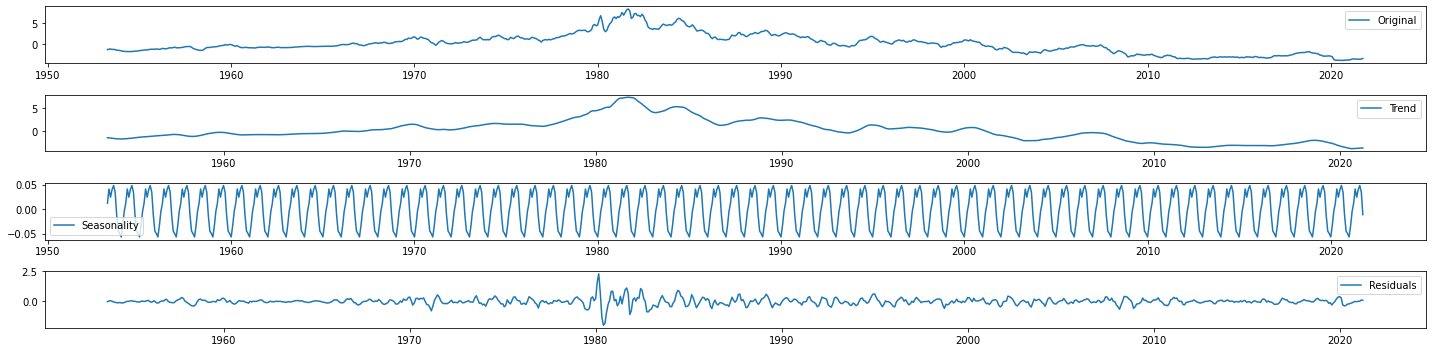

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_pca1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_pca1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

From the decomposition graphs above, we can see that the trend, and seasonality separately from the data series and then we can model the residuals. Next we check stationarity of residuals (still using the Dickey-Fuller test):

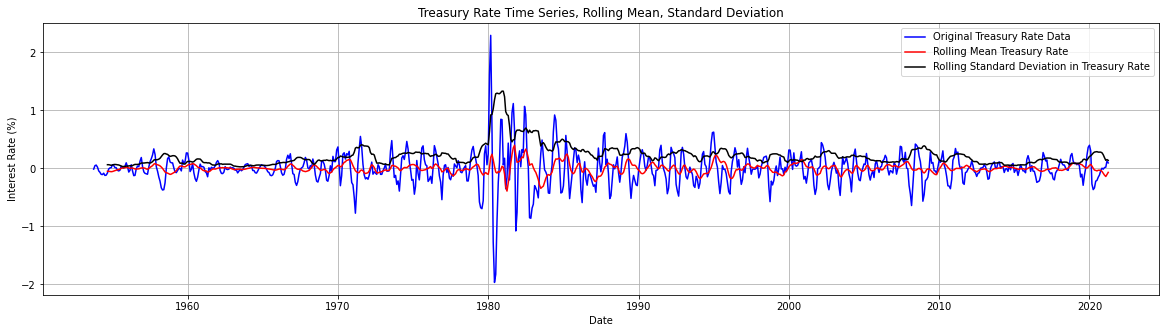

Results of Dickey-Fuller Test:
Test Statistic                -9.650127e+00
p-value                        1.442198e-16
#Lags Used                     1.800000e+01
Number of Observations Used    7.920000e+02
Critical Value (1%)           -3.438634e+00
Critical Value (5%)           -2.865196e+00
Critical Value (10%)          -2.568717e+00
dtype: float64


In [37]:
df_pca1_decompose = residual
df_pca1_decompose.dropna(inplace=True)
test_stationarity(df_pca1_decompose)

**Decomposition Result**

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. Hence, we can conclude that this time series is very close to stationary. Please note, converting the residuals into original values for future data in not very intuitive in this case.

### **Forecasting the US Treasury Interest Rate**
In this step, we would be predicting future interest rates based on our historical data series and current data (in particular, August 2020 - August 2021). The model of choice is Auto-Regressive Integrated Moving Averages (ARIMA) which is a linear combination of the historical stationary time series.
To forgo the time consuming process of hyperparameter, we will use the auto_arima package.

First, we will split our data for training and testing and visualize the split: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



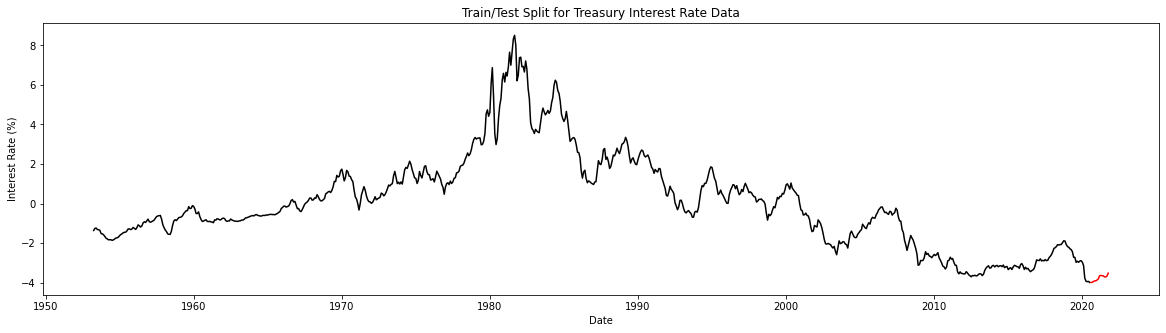

In [39]:
df_pca1['Date'] = df_pca1.index
train = df_pca1[df_pca1['Date'] < pd.to_datetime("2020-08", format='%Y-%m')]
train['train'] = train['pca1_0']
del train['Date']
del train['pca1_0']
test = df_pca1[df_pca1['Date'] >= pd.to_datetime("2020-08", format='%Y-%m')]
del test['Date']
test['test'] = test['pca1_0']
del test['pca1_0']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test Split for Treasury Interest Rate Data")
plt.ylabel("Interest Rate (%)")
plt.xlabel('Date')
sns.set()
plt.show()

The above figure illustrates the distribution of our training series (corresponding to the black line) and the testing series (corresponding to the red line).

**Auto ARIMA Procedure**

In [276]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 10.3 MB/s 
     |████████████████████████████████| 9.8 MB 67.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [40]:
from statsmodels.tsa.arima_model import ARIMA
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-158.361, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3.336, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-108.552, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-158.251, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5.188, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-160.357, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-160.368, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-158.724, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-160.112, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-158.360, Time=1.49 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-162.273, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-160.171, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-162.244, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-160.625, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

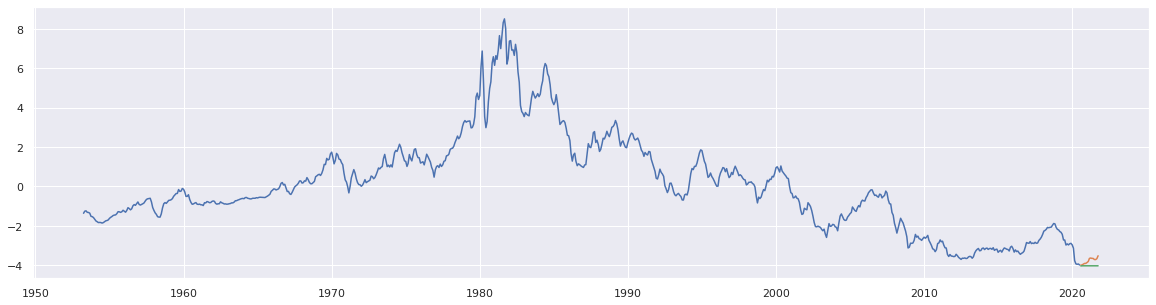

In [41]:
#plot the predictions for validation (Test Data) set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

The plot above illustrates the training data series (blue line), testing/validation data series (orange line), and the forecasted data series (green line). Finally, we compute the root mean squared error (RMSE).

**Root Mean Squared Error (RMSE) Procedure**

In [43]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE",rms)

RMSE 0.29342815796106547


In [44]:
print(forecast)

            Prediction
Date                  
2020-08-01   -4.038043
2020-09-01   -4.030814
2020-10-01   -4.030814
2020-11-01   -4.030814
2020-12-01   -4.030814
2021-01-01   -4.030814
2021-02-01   -4.030814
2021-03-01   -4.030814
2021-04-01   -4.030814
2021-05-01   -4.030814
2021-06-01   -4.030814
2021-07-01   -4.030814
2021-08-01   -4.030814
2021-09-01   -4.030814
2021-10-01   -4.030814


## **Autocorrelation**

This is also an important step in time series analysis because it measures how correlated the time series data is at a given point in time with previous values. For instance, if the treasury interest rate data series has a strong autocorrelation, we can assume that high interest rate value today suggest a strong likelihood that the interest rate will be high the following day too. For this procedure, we will be using the autocorrelation method in the Pandas F=data frame to compute the autocorrelation in the reduced dimension data series of the US treasury interest rate.

We will be calculating the autocorrelation for a one-month lag, three-month lag, six-month lag, nine-month lag, and twelve-month lag.

In [46]:
autocorrelation_lag1 = df_pca1['pca1_0'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9950603221678864


In [47]:
autocorrelation_lag3 = df_pca1['pca1_0'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

Three Month Lag:  0.9790271338818565


In [48]:
autocorrelation_lag6 = df_pca1['pca1_0'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

Six Month Lag:  0.9586217817364011


In [49]:
autocorrelation_lag9 = df_pca1['pca1_0'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Nine Month Lag:  0.9409101559414627


In [50]:
autocorrelation_lag12 = df_pca1['pca1_0'].autocorr(lag=12)
print("Twelve Month Lag: ", autocorrelation_lag12)

Twelve Month Lag:  0.9175675237448949


**Autocorrelation Function (ACF) and Partial Correlation Function (PACF)**

These two plots are quite important as well because it helps determine the value of ARIMA auto-regressive (AR) terms -"p" and moving average (MA) terms -"q".
1.   **Autocorrelation Function (ACF):** It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2.   **Partial Autocorrelation Function (PACF):** This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

**ACF & PACF Procedure**

They are plotted for the differenced time series data as shown below:



In [52]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_pca1_diff, nlags=20)
lag_pacf = pacf(df_pca1_diff, nlags=20, method='ols')

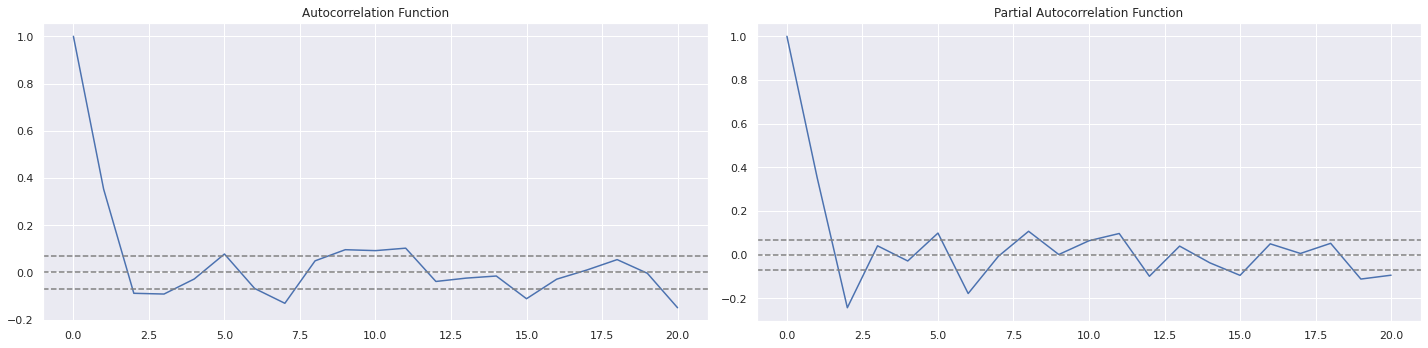

In [55]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_pca1_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_pca1_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_pca1_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_pca1_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**ACF and PACF Results Interpretation**

In the plot above, the two dotted lines on either sides of 0.0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

**p –** The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

**q –** The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## **Discussion and Recommendation**
Conducting time series data analysis is a task that almost every data scientist will face in their career. Having a good understanding of the tools and methods for analysis can enable data scientists to uncover trends, anticipate events and consequently inform decision making. Understanding the seasonality patterns through stationarity, autocorrelation and trend decomposition can guide promotion planning throughout the year, which can improve profits for companies. Finally, time series forecasting is a powerful way to anticipate future events in your time series data, which can also significantly impact decision making. These types of analyses are invaluable to any data scientist or data science team that looks to bring value to their company with time series data. The code from this post is available on GitHub.